<a href="https://colab.research.google.com/github/Silverlake86/StockPriceForecaster/blob/main/Stockprice_Forecasting_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2020-12-17')

#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2020-12-11,122.760002,120.550003,122.430000,122.410004,86939800.0,122.227356
2020-12-14,123.349998,121.540001,122.599998,121.779999,79184500.0,121.598289
2020-12-15,127.900002,124.129997,124.339996,127.879997,157572300.0,127.689186


In [ ]:
#Get the number of rows and columns in the data set
df.shape

(2256, 6)

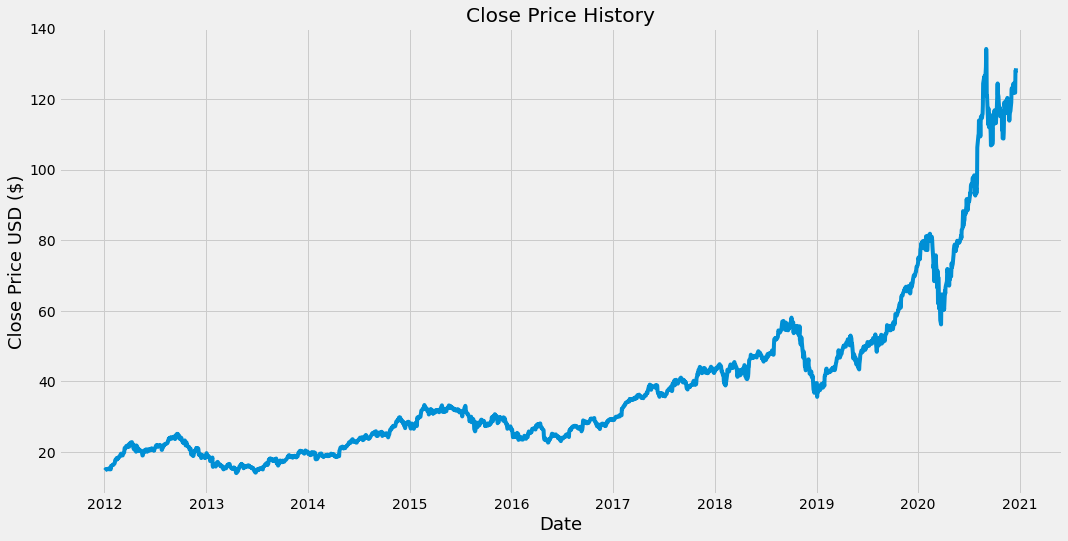

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [ ]:
#Create a new Dataframe with only close column
data = df.filter(['Close'])
#Convert the Dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1805

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680526],
       [0.00816869],
       ...,
       [0.94760156],
       [0.94701935],
       [0.95442167]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()


[array([0.0061488 , 0.00680526, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869743, 0.01014998,
       0.01145994, 0.01105596, 0.00884298, 0.01095496, 0.00887566,
       0.01667305, 0.01607006, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182525, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512387,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499022, 0.04593482, 0.04796363, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.0639921 , 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680526, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869743, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #1 is for the closing price, 
x_train.shape #2 Dimensional Model

(1745, 60, 1)

In [ ]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Train the Model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1745/1745 [==============================] - 39s 22ms/step - loss: 2.4034e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2256
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])
    

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test )**2)
rmse

3.1214755580589144

<ipython-input-32-9770d9b6b330>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

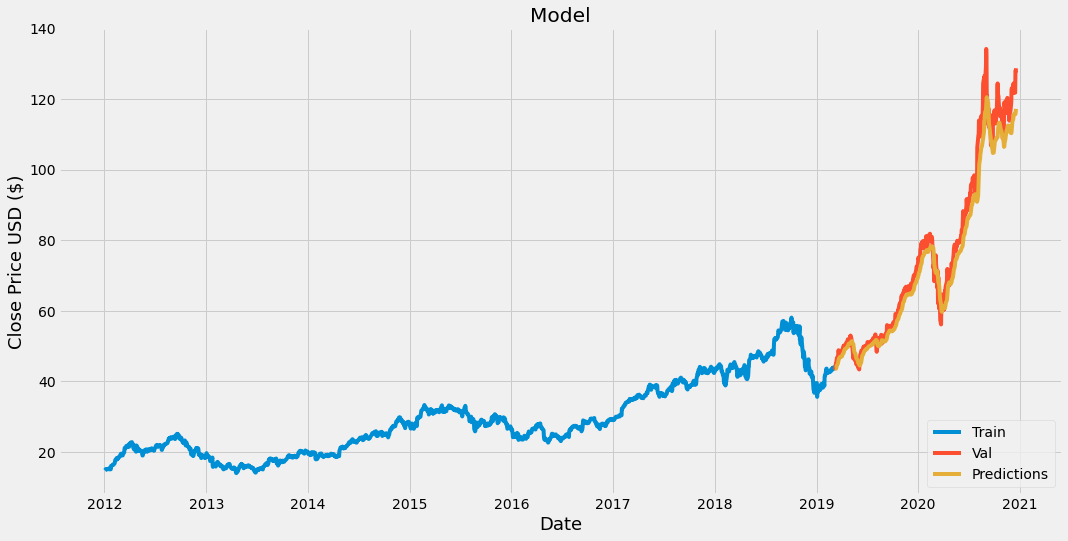

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [ ]:
#Show the value and predicted prices
valid

,Close,Predictions
Date,,
2019-03-08,43.227501,43.575123
2019-03-11,44.724998,43.511883
2019-03-12,45.227501,43.621792
2019-03-13,45.427502,43.857414
2019-03-14,45.932499,44.146667
...,...,...
2020-12-11,122.410004,115.850464
2020-12-14,121.779999,115.847282
2020-12-15,127.879997,115.703018


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2020-12-17')

#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array 
X_test = np.array(X_test)

#Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaliing
prediction_price = scaler.inverse_transform(pred_price)
print(prediction_price)

[[118.103195]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2020-12-17', end = '2020-12-17')
print(apple_quote2['Close'])

Date
2020-12-16    127.809998
2020-12-17    128.699997
Name: Close, dtype: float64
